**Zadanie 3 Laboratorium Statystycznej Eksploracji Danych**

**Autor:** Mateusz Wasiluk

**Cel ćwiczenia:** Analiza skuteczności klasyfikatora k-najbliższych-sąsiadów

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import math as mt
import pandas as pd


Przygotowanie zbioru danych przez wylosowanie z dwuwymiarowych rozkładów Gaussa o zadanych parametrach oraz deklaracja listy etykiet klas (labels):

In [2]:
S = np.array([[4, 2],[2, 4]]) 

m1 = np.array([-1,-1]) 
m2 = np.array([2,2])

n1=30 
n2=20

class1 = np.random.multivariate_normal(m1, S, n1) 
class2 = np.random.multivariate_normal(m2, S, n2)

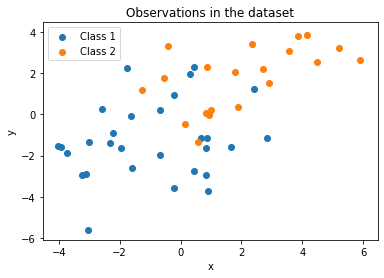

In [3]:
fig, ax = plt.subplots(); 
ax.scatter(class1[:,0], class1[:,1], label='Class 1');
ax.scatter(class2[:,0], class2[:,1], label='Class 2');
ax.set_xlabel('x'); 
ax.set_ylabel('y');
ax.set_title('Observations in the dataset')
ax.legend()
plt.show()

In [4]:
data = np.append(class1, class2, axis=0)

In [5]:
y = [0 for _ in range(n1)]
y += [1 for _ in range(n2)]

Analiza skuteczności klasyfikatora metodą podwójnego podstawienia:

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

scores, tps, tns = [], [], []

for nn in range(1, 22):
    knn = KNeighborsClassifier(n_neighbors=nn)
    knn.fit(data, y)
    scores.append(knn.score(data, y))
    conf_matrix = confusion_matrix(y, knn.predict(data))
    tns.append(conf_matrix[0, 0])
    tps.append(conf_matrix[1, 1])



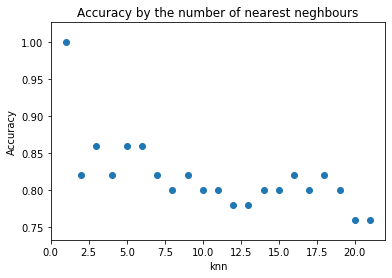

In [7]:
fig, ax = plt.subplots(); 
ax.scatter(range(1, 22), scores[:]);
ax.set_xlabel('knn'); 
ax.set_ylabel('Accuracy');
ax.set_title('Accuracy by the number of nearest neghbours')
plt.show()

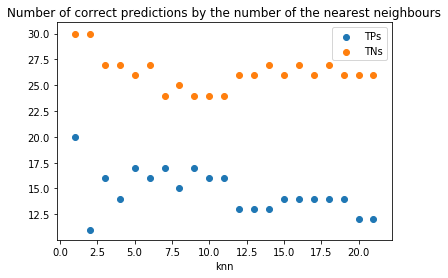

In [8]:
fig, ax = plt.subplots(); 
ax.scatter(range(1, 22), tps[:], label='TPs');
ax.scatter(range(1, 22), tns[:], label='TNs');
ax.legend()
ax.set_xlabel('knn'); 
ax.set_title('Number of correct predictions by the number of the nearest neighbours')
plt.show()

Analiza skuteczności klasyfikatora z wykorzystaniem próbki testowej (10 losowo wybranych punktów z klasy 1, 5 punktów z klasy 2, wyniki uśrednione po 10 losowaniach):

In [9]:
from sklearn.model_selection import train_test_split


scores, tps, tns = [], [], []

for nn in range(1, 22):
    knn = KNeighborsClassifier(n_neighbors=nn)
    
    for ii in range(10):
        X1_train, X1_test, y1_train, y1_test = train_test_split(class1, y[:30],test_size=10, random_state=None)
        X2_train, X2_test, y2_train, y2_test = train_test_split(class2, y[30:], test_size=5, random_state=None)

        
        knn.fit(np.append(X1_train,X2_train, axis=0), np.append(y1_train, y2_train, axis=0))

        pt = np.append(X1_test, X2_test, axis=0)
        yt = np.append(y1_test, y2_test)
        tmp_scores, tmp_tps, tmp_tns = [], [], []
        tmp_scores.append(knn.score(pt, yt))
        conf_matrix = confusion_matrix(yt, knn.predict(pt))
        tmp_tns.append(conf_matrix[0, 0])
        tmp_tps.append(conf_matrix[1, 1])
    scores.append(np.mean(tmp_scores))
    tps.append(np.mean(tmp_tps))
    tns.append(np.mean(tmp_tns))
    

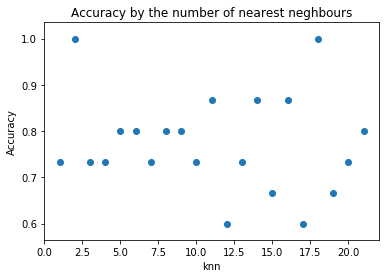

In [10]:
fig, ax = plt.subplots(); 
ax.scatter(range(1, 22), scores[:]);
ax.set_xlabel('knn'); 
ax.set_ylabel('Accuracy');
ax.set_title('Accuracy by the number of nearest neghbours')

plt.show()

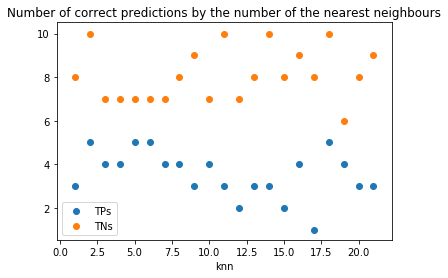

In [11]:
fig, ax = plt.subplots(); 
ax.scatter(range(1, 22), tps[:], label='TPs');
ax.scatter(range(1, 22), tns[:], label='TNs');
ax.legend()
ax.set_xlabel('knn'); 
ax.set_title('Number of correct predictions by the number of the nearest neighbours')

plt.show()

Obserwacje: Dokładność klasyfikatora bardzo silnie zależy od wybranej liczby najbliższych sąsiadów (prawdopodobnie ponieważ wiele z puntów należących do różnych klas leży bardzo blisko siebie). Podobną zależność (choć znacznie mniej wyraźną) można zaobserwować w przypadku wartości TP i TN.


Użycie próbek testowych dało znacznie większy rozrzut punktów dla wszystkich prezentowanych wykresów. Świadczy to o wysokiej wrażliwości klasyfikatora na wybór próbek uczącej i testowej.
